# 0.importing important libraries

In [ ]:
import time # for checking the time
import torch #here just assume it is used for making torch tensors and these type of stuff
import torch.nn as nn  #assume this is the thing which will help you to make your neural network
import torch.nn.functional as F #assume this is the thing which will help you to get loss functions,optimizers etc
from torch.utils.data import DataLoader # for loading data into batches
from torchvision import datasets,transforms # datasets for getting pytorch datasets,
#and transforms ,like here , we will convert pics into tensors with the help of transforms
import matplotlib.pyplot as plt # for data Visulization

# 1. Preparing Data

In [ ]:
train_dataset=datasets.FashionMNIST(root='/dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='/dataset',train=False,transform=transforms.ToTensor())#converting into tensors

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.69MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 57.1MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.1MB/s]


In [ ]:
batch_size=64
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)#converting into batches

# 2.Building Model

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self,in_dim,n_class):
    super().__init__()
    self.linear=nn.Linear(in_dim,n_class)

  def forward(self,x):
    out=self.linear(x)
    return out

In [ ]:
model=LogisticRegression(28 * 28 , 10)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu' #selecting device cpu/gpu
model=model.to(device)

# 3 .Picking a loss Function and Optimizer

In [ ]:
learning_rate=1e-3
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# 4.Training Loop

In [ ]:
num_epochs=10

In [ ]:
for epoch in range(num_epochs): #initializing our for loop ,
    print('*' * 10)
    print(f'epoch {epoch+1}')
    since = time.time()
    running_loss = 0.0
    running_acc = 0.0
    model.train()   #used before training the model
    for i, data in enumerate(train_loader, 1): #getting index numbers with data
        img, label = data #getting img and labels from our data
        img = img.view(img.size(0), -1)
        img=img.to(device)
        label=label.to(device)

        out = model(img)  #getting our prediction from model
        loss = criterion(out, label)  # getting loss
        running_loss += loss.item()
        _, pred = torch.max(out, 1)
        running_acc += (pred==label).float().mean()

        optimizer.zero_grad() # making our gradients zero (it is necessary )
        loss.backward()  #doing backpropagation
        optimizer.step() #applying optimizer on it

        if i % 300 == 0: #for printing losses ,print out what is happing every 300 indexing
            print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')
    print(f'Finish {epoch+1} epoch, Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')

**********
epoch 1
[1/10] Loss: 1.976396, Acc: 0.461615
[1/10] Loss: 1.799765, Acc: 0.546354
[1/10] Loss: 1.671935, Acc: 0.583472
Finish 1 epoch, Loss: 1.658441, Acc: 0.586854
**********
epoch 2
[2/10] Loss: 1.269598, Acc: 0.666094
[2/10] Loss: 1.225828, Acc: 0.670052
[2/10] Loss: 1.187339, Acc: 0.675000
Finish 2 epoch, Loss: 1.183487, Acc: 0.674890
**********
epoch 3
[3/10] Loss: 1.057526, Acc: 0.685677
[3/10] Loss: 1.034649, Acc: 0.691172
[3/10] Loss: 1.016261, Acc: 0.694653
Finish 3 epoch, Loss: 1.014391, Acc: 0.694979
**********
epoch 4
[4/10] Loss: 0.947188, Acc: 0.707240
[4/10] Loss: 0.934138, Acc: 0.711536
[4/10] Loss: 0.925362, Acc: 0.713663
Finish 4 epoch, Loss: 0.924370, Acc: 0.714252
**********
epoch 5
[5/10] Loss: 0.877900, Acc: 0.727344
[5/10] Loss: 0.873959, Acc: 0.726901
[5/10] Loss: 0.867043, Acc: 0.729740
Finish 5 epoch, Loss: 0.866101, Acc: 0.730710
**********
epoch 6
[6/10] Loss: 0.842046, Acc: 0.739063
[6/10] Loss: 0.832903, Acc: 0.741510
[6/10] Loss: 0.825052, Acc:

#5.Evaluating Model

In [ ]:
model.eval()  #for checking how good is your model on the test dataset  (for evaluation )
eval_loss = 0.
eval_acc = 0.
for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        img=img.to(device)
        label=label.to(device)
        with torch.no_grad(): # because here we do not need gradients because we are just testing our model,
            out = model(img)
            loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = torch.max(out, 1) #getting prediction from our model for testing the result
        eval_acc += (pred == label).float().mean()
        print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}')
        print(f'Time:{(time.time()-since):.1f} s')

Test Loss: 0.005168, Acc: 0.004279
Time:115.5 s
Test Loss: 0.008760, Acc: 0.009853
Time:115.5 s
Test Loss: 0.012979, Acc: 0.014928
Time:115.5 s
Test Loss: 0.017541, Acc: 0.019606
Time:115.5 s
Test Loss: 0.021957, Acc: 0.024781
Time:115.5 s
Test Loss: 0.026004, Acc: 0.029956
Time:115.5 s
Test Loss: 0.030144, Acc: 0.034932
Time:115.5 s
Test Loss: 0.034794, Acc: 0.039809
Time:115.5 s
Test Loss: 0.039367, Acc: 0.044486
Time:115.5 s
Test Loss: 0.044891, Acc: 0.049064
Time:115.5 s
Test Loss: 0.050072, Acc: 0.054140
Time:115.5 s
Test Loss: 0.055128, Acc: 0.058818
Time:115.5 s
Test Loss: 0.059236, Acc: 0.064192
Time:115.5 s
Test Loss: 0.062951, Acc: 0.069268
Time:115.5 s
Test Loss: 0.067415, Acc: 0.074244
Time:115.6 s
Test Loss: 0.073319, Acc: 0.078623
Time:115.6 s
Test Loss: 0.077676, Acc: 0.083698
Time:115.6 s
Test Loss: 0.083235, Acc: 0.088077
Time:115.6 s
Test Loss: 0.088388, Acc: 0.092655
Time:115.6 s
Test Loss: 0.093600, Acc: 0.097631
Time:115.6 s
Test Loss: 0.098414, Acc: 0.102408
Time:

5.1 visulizing the model

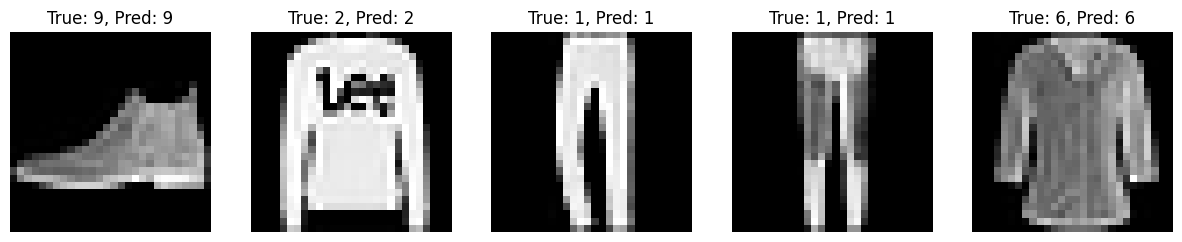

In [ ]:
# Visualizing some predictions
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
#fig is a reference to the entire figure.
#ax is an array of Axes objects, and each Axes object can be used to draw a plot. Since there are 5 subplots, ax contains 5 such objects.
#figsize=(15, 3) sets the size of the entire figure to 15 inches wide and 3 inches tall.
fig, ax = plt.subplots(1, 5, figsize=(15, 3)) #The arguments (1, 5) specify that the figure should have 1 row of 5 columns, i.e., 5 subplots aligned horizontally.
for i in range(5):
    ax[i].imshow(images[i].reshape(28, 28).cpu(), cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax[i].axis('off')
plt.show()

# 7.Saving The Model

In [ ]:
torch.save(model.state_dict(),'./LogisticRegression.pth')